# Machine learning
## Chapter 5, Gaussian
## Jun Sup Shin, Digital Imaging, GSAIM, CAU

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Gaussian function
$$G(x;\mu,\sigma)=\frac{1}{(2\pi\sigma^{2})^{1/2}} \exp{\left(-\frac{(x-\mu)^2}{\sigma^2}\right)}$$

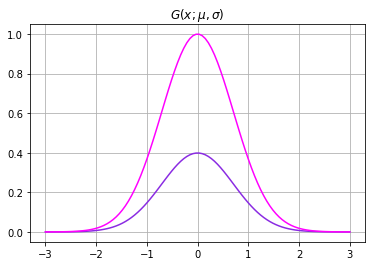

In [2]:
def gaussian(x, mu, sigma, normalize:bool = True):
    norm_term = 1
    if normalize is True:
        norm_term = 1 / np.sqrt(2 * np.pi * np.power(sigma, 2))
    return norm_term * np.exp(-np.power(x-mu, 2) / np.power(sigma, 2))

x = np.linspace(-3, 3, 100)

plt.plot(x, gaussian(x, 0, 1), color='blueviolet')
plt.plot(x, gaussian(x, 0, 1, False), color='magenta')
plt.title('$G(x;\mu, \sigma)$')
plt.grid(True)
plt.show()

## 2D Gaussian function
$$G_{2D}(\mathbf{x};\mathbf{\mu}, \Sigma) = \frac{1}{2\pi {\left| \Sigma \right|}^{-1/2}} \exp{(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu}))}$$

where $\mathbf{\mu} = [\mu_1, \mu_2]^T$ is mean, $\Sigma$ is covariance

## Covariance of 2D Gaussian
$$
\Sigma =\begin{bmatrix}
{\sigma_x}^2 & {\sigma_{xy}} \\
{\sigma_{xy}} & {\sigma_y}^2
\end{bmatrix}
$$

where $\sigma_x$ and $\sigma_y$ are standard deviation of x axis and y axis repectively

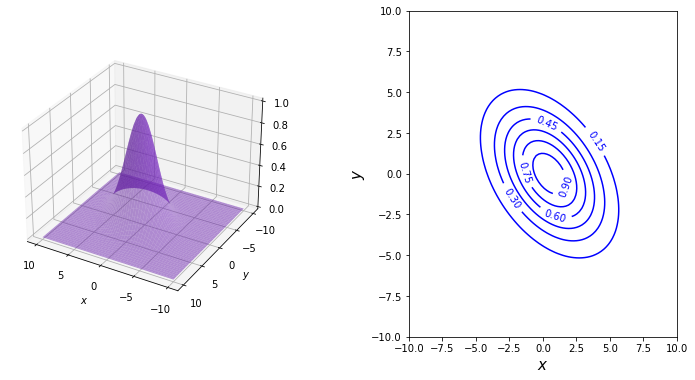

In [3]:
def gaussian_2D(x, y, mu, Sigma, normalize:bool = True):
    norm_term = 1
    if normalize is True:
        norm_term = 1 / (2 * np.pi * np.power(np.linalg.det(Sigma), -0.5))

    _x = np.reshape(x, (1, -1))
    _y = np.reshape(y, (1, -1))

    xy = np.concatenate((_x, _y), axis=0)

    exp_term = np.matmul(np.transpose(xy - mu), np.linalg.inv(Sigma))
    exp_term = -0.5 * np.matmul(exp_term, xy - mu)

    exp_term = np.reshape(np.diag(exp_term), (y.shape[0], x.shape[1]))

    return norm_term * np.exp(exp_term)

from mpl_toolkits.mplot3d import Axes3D

x, y = np.linspace(-10, 10, 100), np.linspace(-10, 10, 100)
_x, _y = np.meshgrid(x, y)
mu = np.array([[0.5], [0]])
Sigma = np.array([[7, -3],[-3, 7]])

plt.figure(figsize = (12, 6))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(_x, _y, gaussian_2D(_x, _y, mu, Sigma), alpha=0.5, color='blueviolet')
ax.view_init(30, 120)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.subplot(1, 2, 2)
cont = plt.contour(_x, _y, gaussian_2D(_x, _y, mu, Sigma), 7, colors='blue')
cont.clabel(fmt='%.2f', fontsize=10)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$y$', fontsize=15)

plt.show()